In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
parlimen_df = pd.read_csv('GE_Parliament_Data.csv')
dun_df = pd.read_csv('GE_Dun_Data.csv')

In [58]:
def individual_election_history_plot(candidates_df,name_keywords):
    candidate1 = candidates_df
    for name_keyword in name_keywords:
        candidate1 = candidate1[candidate1.Name.str.contains(name_keyword,case=False)]
    candidate1 = candidate1.sort_values(by=['year']).reset_index(drop=True)
    # exit
    if candidate1.shape[0]==0:
        print('Name not found')
        return None
    # step 2
    competition1 = pd.DataFrame()
    for row_no in range(candidate1.shape[0]):
        df = candidates_df[(candidates_df.year==candidate1.year[row_no]) &
                          (candidates_df.ParliamentCode==candidate1.ParliamentCode[row_no]) &
                          (candidates_df.type==candidate1.type[row_no])]
        competition1 = pd.concat([competition1,df])
    competition1.reset_index(drop=True,inplace=True)

    # step 3
    years = competition1.year.unique()
    
    fig, ax = plt.subplots(len(years), 1,figsize=(8,3*len(years)), facecolor='white')
    fig.tight_layout()
    for i in range(len(years)):
        df = competition1[competition1.year==years[i]]
        df.reset_index(drop=True,inplace=True)
        
        if len(years)>1:
            ax[i].bar(df.Name, df.Votes, width=0.4)
            ax[i].title.set_text(df.SeatName[0]+'\n'+df.Event[0])
            ax[i].set_xticklabels(df.Name,rotation=10)
        else:
            ax.bar(df.Name, df.Votes)
            ax.title.set_text(df.SeatName[0]+'\n'+df.Event[0])
            ax.set_xticklabels(df.Name,rotation=30)
        
    fig.tight_layout()
    plt.show()
#     plt.savefig('_'.join(name_keywords)+'.png')

PICKING ANUAR IBRAHIM

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)


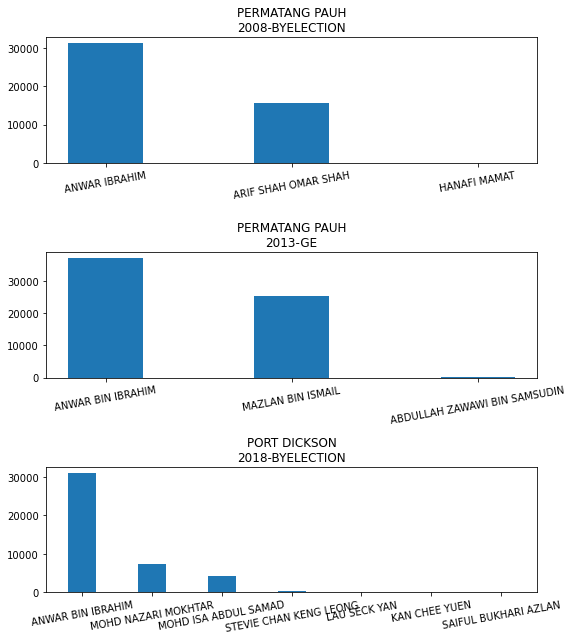

In [51]:
individual_election_history_plot(parlimen_df,['anwar','ibrahim'])

PICKING PEJA

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\4215862870.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Name,rotation=10)


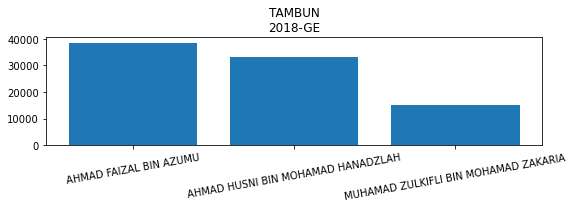

<Figure size 432x288 with 0 Axes>

In [35]:
individual_election_history_plot(parlimen_df,['faizal','azumu'])

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\111885083.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Name,rotation=10)


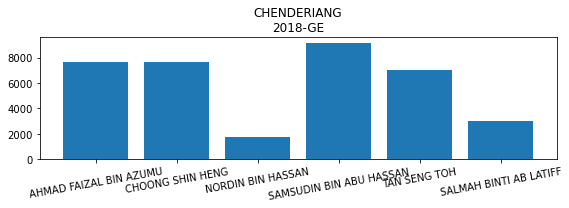

<Figure size 432x288 with 0 Axes>

In [49]:
individual_election_history_plot(dun_df,['faizal','azumu'])

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\111885083.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Name,rotation=10)


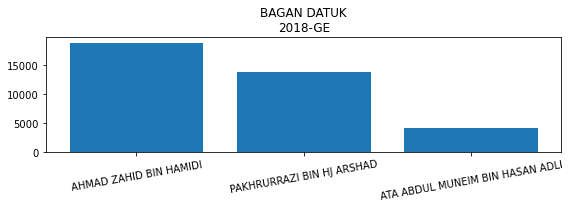

<Figure size 432x288 with 0 Axes>

In [47]:
individual_election_history_plot(parlimen_df,['zahid','hamidi'])

In [48]:
individual_election_history_plot(dun_df,['zahid','hamidi'])

Name not found


In [40]:
dun_df.columns

Index(['Party', 'Name', 'Votes', 'NameBallot', 'majority', 'Event', 'year',
       'type', 'State', 'ParliamentCode', 'StateCode', 'SeatName',
       'EligibleVoters', 'MalayVoters', 'ChineseVoters', 'IndianVoters',
       'OtherVoters', 'BumiMuslimVoters', 'BumiNonmuslimVoters',
       'SabahBumiVoters', 'Early', 'Postal', 'Spoilt', 'Turnout', 'Unreturned',
       'Unopposed'],
      dtype='object')

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\4215862870.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\4215862870.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\4215862870.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\4215862870.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)


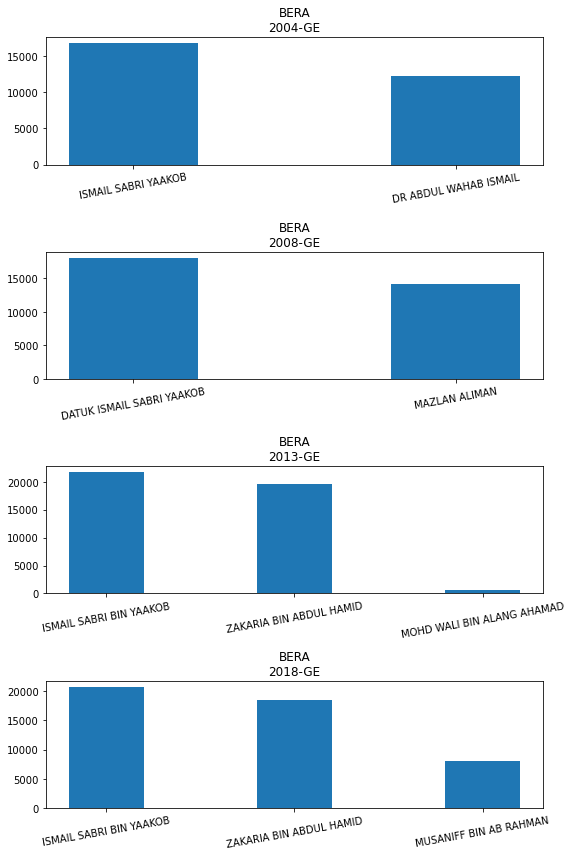

<Figure size 432x288 with 0 Axes>

In [38]:
individual_election_history_plot(parlimen_df,['ismail','sabri'])

C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\1548147099.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)


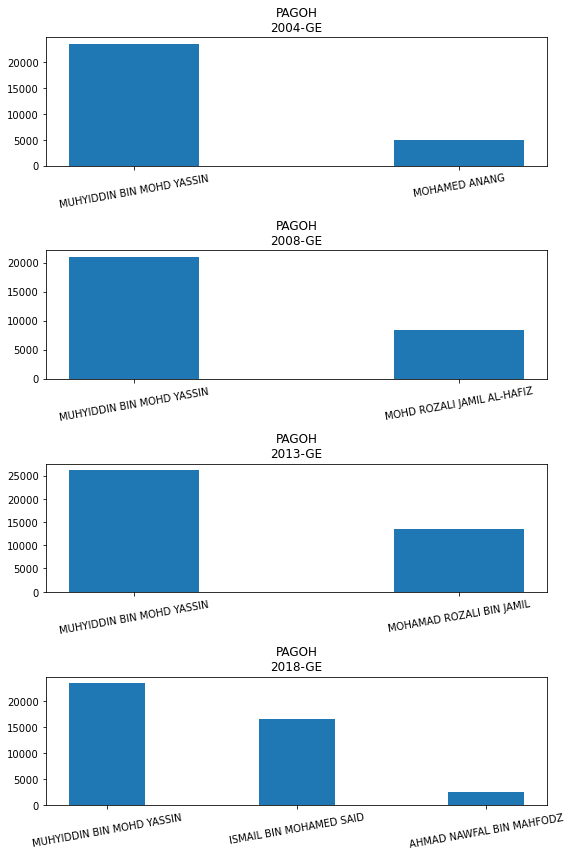

In [52]:
individual_election_history_plot(parlimen_df,['muhyiddin'])

In [54]:
individual_election_history_plot(parlimen_df,['AMINUDDIN','HANAFIAH'])

Name not found


C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\2566020244.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)
C:\Users\TMRND\AppData\Local\Temp\ipykernel_20520\2566020244.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df.Name,rotation=10)


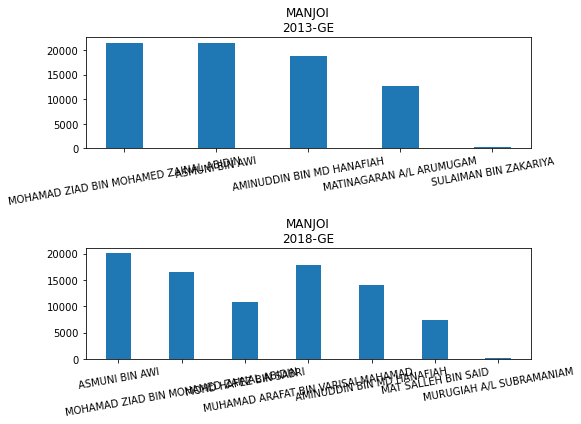

In [59]:
individual_election_history_plot(dun_df,['AMINUDDIN','HANAFIAH'])